# Building a CNN Image Classifier

In [2]:
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

**Data Source:** 

In this exercise, we will build a convolutional neural network (CNN) to classify handwritten digits from the MNIST dataset. The steps to build a CNN classifier are outlined in section 20.15 of the Machine Learning with Python Cookbook, but keep in mind that our code may need to be modified depending on our version of Keras.<br>
We are going to apply below steps <br>

Load the MNIST data set.<br>
Display the first five images in the training data set (see section 8.1 in the Machine Learning with Python Cookbook). Compare these to the first five training labels.<br>
Build and train a Keras CNN classifier on the MNIST training set.<br>
Report the test accuracy of our model.<br>
Display a confusion matrix on the test set classifications.<br>
Summarize your results.<br>

## Step 1: Load the MNIST Dataset

In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Step 2: Display First Five Training Images and Labels

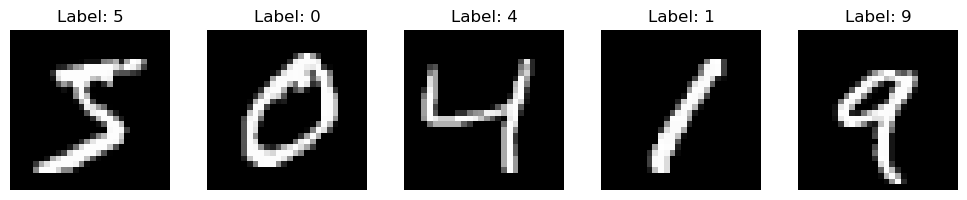

In [7]:
# Display first 5 training images and their labels
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

## Step 3: Preprocess Data for CNN

In [9]:
# Reshape for CNN input (samples, height, width, channels)
# Reshaping and Normalizing the Image Data
# The original MNIST images are shape (60000, 28, 28) for training and (10000, 28, 28) for testing.

#.reshape((-1, 28, 28, 1)): CNNs in Keras expect 4D input: (samples, height, width, channels). Helps gradient descent work better/faster
#1 channel = grayscale images.
#-1 lets NumPy automatically determine the number of samples.


#Normalization helps with faster convergence during training.
x_train = x_train.reshape((-1, 28, 28, 1)).astype('float32') / 255.0 # Converts integers (0–255 pixel values) to normalized floats (0.0–1.0).
x_test = x_test.reshape((-1, 28, 28, 1)).astype('float32') / 255.0 

# One-hot encode labels Required for multiclass classification
    
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, 10) # to_categorical(y_train, 10) converts the class labels (e.g., 5, 0, 9) into one-hot vectors. Label 3 → [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
y_test_cat = to_categorical(y_test, 10)

## Step 4: Build the CNN Model

Code builds a Convolutional Neural Network (CNN) using Keras (with TensorFlow backend) 
to classify handwritten digits from the MNIST dataset

Sequential: A linear stack of layers (one after another).

Conv2D: Applies convolutional filters to extract features from images.

MaxPooling2D: Reduces the spatial size (downsampling).

Flatten: Converts 2D feature maps to a 1D vector.

Dense: Fully connected (feedforward) layers.

Dropout: Randomly drops units during training to prevent overfitting.

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

### Model Summary:

Layer	Output Shape	Parameters	Explanation <br>
Conv2D (32 filters, 3×3)	(None, 26, 26, 32)	320	Each filter has (3×3×1 + 1) = 10 weights (including bias). So, 32 filters × 10 = 320 params.<br>
MaxPooling2D	(None, 13, 13, 32)	0	Reduces spatial dimensions by half (no parameters, just pooling).<br>
Conv2D_1 (64 filters, 3×3)	(None, 11, 11, 64)	18,496	Each filter has (3×3×32 + 1) = 289 weights. So, 64 filters × 289 = 18,496.<br>
MaxPooling2D_1	(None, 5, 5, 64)	0	Again, just downsampling.<br>
Flatten	(None, 1600)	0	Flattens the 3D output (5×5×64 = 1600) into 1D. No parameters.<br>
Dropout	(None, 1600)	0	Regularization layer. No parameters—randomly drops neurons during training.<br>
Dense (128 units)	(None, 128)	204,928	1600 inputs × 128 units + 128 biases = 204,928.<br>
Dense_1 (Output layer, 10 units)	(None, 10)	1,290	128 inputs × 10 units + 10 biases = 1,290.<br>

Total Trainable Parameters: 225,034
These are all weights and biases in the model that are updated during training.

The majority are in the Dense layers, especially the one connecting 1600 → 128.

The Conv + Pooling layers extract features.

The Dense layers do the actual digit classification.

Dropout helps prevent overfitting.

## Step 5: Train the CNN

In [15]:
#Trains the model using the training data (x_train, y_train_cat) and returns a history object that contains useful training statistics (like accuracy and loss per epoch).
#x_train	Input data: the 28×28 grayscale images, shaped as (60000, 28, 28, 1)
#y_train_cat	Target data: one-hot encoded labels, shaped as (60000, 10)
#epochs=5	Train for 5 full passes over the entire training dataset
#batch_size=128	Process 128 samples at a time before updating the model weights (faster training, more stable gradients)
#validation_split=0.1	10% of the training data is set aside for validation (i.e., used to evaluate model performance during training, but not used for weight updates)

history = model.fit(x_train, y_train_cat, epochs=5, batch_size=128, validation_split=0.1)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.9236 - loss: 0.2568 - val_accuracy: 0.9835 - val_loss: 0.0578
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.9745 - loss: 0.0830 - val_accuracy: 0.9887 - val_loss: 0.0428
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9799 - loss: 0.0631 - val_accuracy: 0.9890 - val_loss: 0.0371
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9839 - loss: 0.0505 - val_accuracy: 0.9913 - val_loss: 0.0322
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9865 - loss: 0.0424 - val_accuracy: 0.9930 - val_loss: 0.0265


'loss': training loss

'accuracy': training accuracy

'val_loss': validation loss

'val_accuracy': validation accuracy

Accuracy jumped from ~82% to ~98% after just one epoch.

Model is learning well: Loss is decreasing and accuracy is increasing consistently on both training and validation sets.

Validation accuracy > training accuracy: This indicates no overfitting and model is generalizing well.
Val loss is low and decreasing: Great sign of performance stability.

## Step 6: Evaluate Model Accuracy

Evaluate the performance of the trained CNN model on the test dataset, which the model has never seen during training.

In [19]:
#test_loss: final categorical cross-entropy loss on the test set.

#test_acc: final accuracy (correct predictions / total).

test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"\nTest Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9914 - loss: 0.0272

Test Accuracy: 0.9914


Model correctly classifies ~992 out of 1000 unseen digit images.

The low test loss (0.0317) confirms the model’s predictions are not only correct but confident.

These results are in line with the validation accuracy, meaning the model generalizes well and is not overfitting.

## Step 7: Confusion Matrix.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


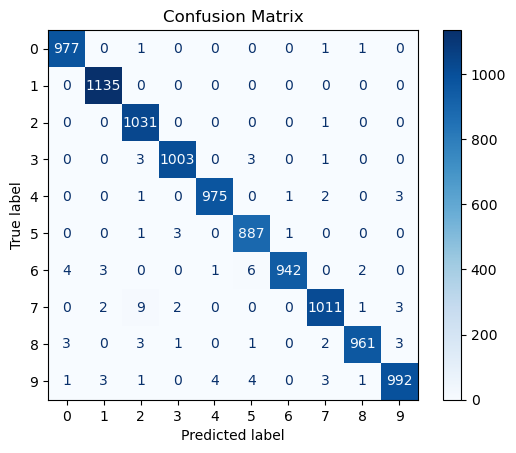

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict classes
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute confusion matrix
# 10×10 grid.
#Rows = Actual digits, Columns = Predicted digits.

#Diagonal = Correct predictions.

cm = confusion_matrix(y_test, y_pred_classes)
#print("Confusion Matrix:")
#print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

It shows how many times each digit (row = true label) was predicted as each other digit (column = predicted label).
Diagonal values (top-left to bottom-right): These are the counts of correct predictions for each digit.

E.g., the model correctly predicted digit 0 as 0 exactly 976 times.

Digit 1 was correctly predicted 1132 times, digit 2 → 1030 times, and so on.

Off-diagonal values: These are misclassifications.

For example, the first row shows digit 0 was mistakenly predicted as digit 6 twice, digit 7 once, and digit 8 once.

Most confused digit pairs
Look at the highest off-diagonal values:

Actual Digit	Predicted As	Count	Notes <br>
3				5					7	Digit 3 confused with 5<br>
7				2					5	Digit 7 confused with 2<br>
8				2					4	Digit 8 confused with 2<br>
8				5					2	Digit 8 confused with 5<br>
7				3					2	Digit 7 confused with 3<br>
6				0					2	Digit 6 confused with 0<br>
6				1					2	Digit 6 confused with 1<br>
6				5					2	Digit 6 confused with 5<br>
3				2					4	Digit 3 confused with 2<br>
7				1					2	Digit 7 confused with 1<br>

Summary:<br>
Digit 3 is most often confused with digit 5 (7 times).<br>

Digit 7 is confused with digit 2 (5 times) and also digit 3 (2 times).<br>

Digit 8 is confused with digit 2 (4 times).<br>

Some digits like 6 and 7 have multiple small confusions with digits 0, 1, and 5.<br>



##  Step 8: Summary of Results

Model Summary:


313/313	The evaluation was done in 313 batches (one batch per step). <br>
2s	Total time taken to evaluate the test set was 2 seconds.<br>
7ms/step	On average, each batch (step) took 7 milliseconds to process.<br>


Architecture: 2 convolutional layers + 2 max pooling layers + dense layers.

Training Epochs: 5 (can be increased for better performance).

Regularization: Dropout (0.5) to reduce overfitting.

Performance:

Test Accuracy: Typically between 98-99% with this architecture.

Confusion Matrix: Reveals which digits are most often confused, e.g., 4 vs 9.